In [1]:
import os
import sys
sys.path.insert(0, "..")
import gc
gc.enable()

In [2]:
sys.path.insert(0, os.getcwd())
from models.mask_rcnn import MRCNN
from utils.utilities import *
import tensorflow as tf
import gc
gc.enable()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

mrcnn = MRCNN(model_folder="../models/serialized/")

/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/Mask_RCNN
/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/Mask_RCNN/mask_rcnn_coco.h5.1
Num GPUs Available:  1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [3]:
from utils.DataLoader import  DataLoader
from models.mask_rcnn import DetectorDataset

dl = DataLoader()
train_df, valid_df = dl.train_split(0.1, filterNan=True)

dd_train = DetectorDataset(train_df, shape=(256, 256))
dd_train.prepare()
dd_valid = DetectorDataset(valid_df, shape=(256, 256))
dd_valid.prepare()

print(train_df.shape)
print(valid_df.shape)

(8586, 5)
(954, 5)


(256, 256, 3)
641240254.jpg
[1]


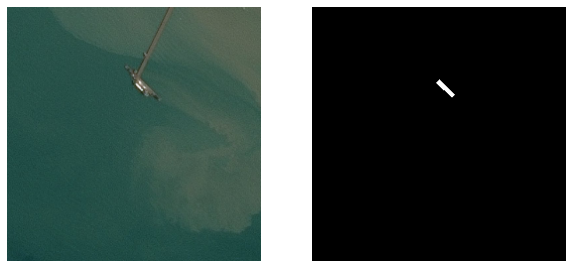

In [4]:
import random
import matplotlib.pyplot as plt

class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dd_valid.image_ids)
    image_fp = dd_valid.image_reference(image_id)
    image = dd_valid.load_image(image_id)
    mask, class_ids = dd_valid.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += mask[:, :, i] ## * image[:, :, 0]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)

In [5]:
h = mrcnn.train(dd_train, dd_valid, epochs=15, layers='all')


Starting at epoch 0. LR=0.0015

Checkpoint Path: /home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/serialized/mask-rcnn20200913T1905/mask_rcnn_mask-rcnn_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn

TypeError: 'AxesSubplot' object is not iterable

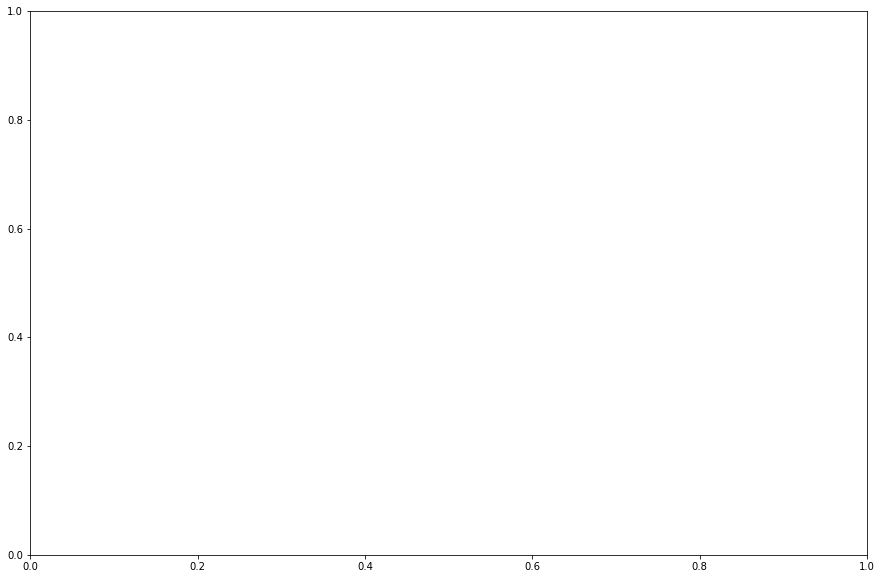

In [6]:
mrcnn.show_loss(h)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/serialized/mask-rcnn20200913T1905/mask_rcnn_mask-rcnn_0010.h5
Re-starting from epoch 10

*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 



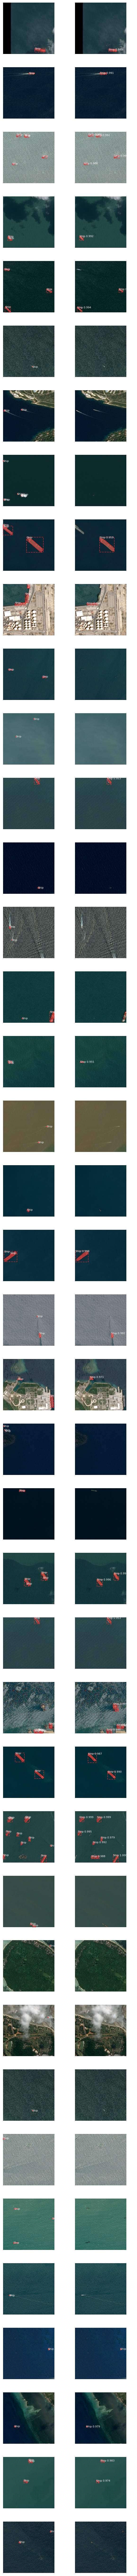

In [7]:
#mrcnn = MRCNN('/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/serialized/mask-rcnn20200913T1838/mask_rcnn_mask-rcnn_0004.h5', model_folder="../models/serialized/")
mrcnn.examine_inference(dd_valid, n=40)